In [1]:
from utils import *
import numpy as np
from tqdm import tqdm
from copy import copy, deepcopy
from skimage.measure import label

# Parsing

In [2]:
def parse(inlines):
    return [ints(l) for l in inlines.split("\n")]

ls = parse(open("data/input14.txt").read())
w, h = 101, 103

# Part 1

In [3]:
nsec = 100
ls2 = deepcopy(ls)
for sec in range(nsec):
    newls = []
    for ex in ls2:
        px = ex[0]
        py = ex[1]
        vx = ex[2]
        vy = ex[3]
        newex = [(px+vx)%w,(py+vy)%h,vx,vy]
        newls.append(newex)
    ls2 = newls

def get_quad(w, h, y, x):
    midrow = (h-1)/2
    midcol = (w-1)/2
    if y<midrow and x<midcol:
        return 1
    if y>midrow and x<midcol:
        return 2
    if y<midrow and x>midcol:
        return 3
    if y>midrow and x>midcol:
        return 4
    return 0

quads = {1:0,2:0,3:0,4:0}
for ex in ls2:
    px = ex[0]
    py = ex[1]
    quad = get_quad(w,h,py,px)
    if quad>0:
        quads[quad] += 1
accum = 1
for k,v in quads.items():
    accum *= v
print(accum)

216772608


# Part 2

In [ ]:
nsec = 6888
ls2 = deepcopy(ls)
quads = None
states = []
for sec in tqdm(range(nsec)):
    newls = []
    for ex in ls2:
        px = ex[0]
        py = ex[1]
        vx = ex[2]
        vy = ex[3]
        newex = [(px+vx)%w,(py+vy)%h,vx,vy]
        newls.append(newex)
    ls2 = newls
    arr = np.zeros((h,w))
    for ex in ls2:
        px = ex[0]
        py = ex[1]
        arr[py, px] += 1
    states.append(arr)
    conn = label(arr>0, connectivity=1)
    counts = []
    for v in range(1,np.max(conn)+1):
        counts.append(np.sum(conn==v))
    maxcount = np.max(counts)
    if maxcount > 100:
        print(sec+1)
        break

100%|██████████| 6888/6888 [00:03<00:00, 1903.82it/s]


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300


/home/ckjellson/anaconda3/envs/aoc/lib/python3.9/site-packages/matplotlib/animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


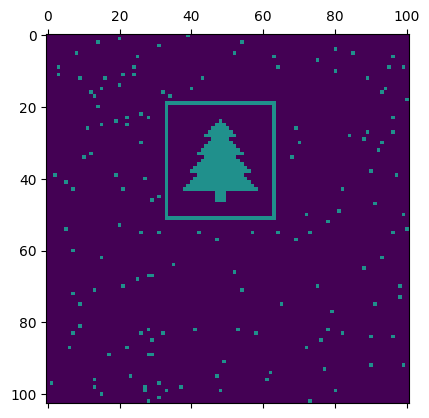

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

pos = 0

def generate_data():
    global pos, states
    to_return = states[-1]
    if pos<len(states):
        to_return = states[pos]
    pos += 4
    if pos%100==0:
        print(pos)
    return to_return

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    global pos, states
    while pos<len(states)+500:
        yield generate_data()

fig, ax = plt.subplots()
mat = ax.matshow(generate_data())
ani = animation.FuncAnimation(fig, update, data_gen, interval=10, save_count=int(round((len(states)+500)/4)))
ani.save("images/14.mp4")

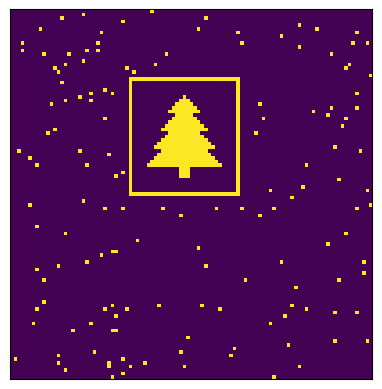

In [18]:
import matplotlib.pyplot as plt
plt.imshow(states[-1])
plt.xticks([])
plt.yticks([])
plt.savefig("images/14.png")